In [4]:
!wget ●	https://commondatastorage.googleapis.com/books1000/notMNIST_large.tar.gz 

--2020-04-12 08:31:11--  http://xn--51h/
Resolving xn--51h (xn--51h)... failed: Name or service not known.
wget: unable to resolve host address ‘xn--51h’
--2020-04-12 08:31:11--  https://commondatastorage.googleapis.com/books1000/notMNIST_large.tar.gz
Resolving commondatastorage.googleapis.com (commondatastorage.googleapis.com)... 64.233.187.128, 2404:6800:4008:c05::80
Connecting to commondatastorage.googleapis.com (commondatastorage.googleapis.com)|64.233.187.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 247336696 (236M) [application/x-tar]
Saving to: ‘notMNIST_large.tar.gz.1’

notMNIST_large.tar. 100%[===================>] 235.88M  87.7MB/s    in 2.7s    

2020-04-12 08:31:15 (87.7 MB/s) - ‘notMNIST_large.tar.gz.1’ saved [247336696/247336696]

FINISHED --2020-04-12 08:31:15--
Total wall clock time: 3.4s
Downloaded: 1 files, 236M in 2.7s (87.7 MB/s)


In [0]:
import tarfile
tar = tarfile.open("notMNIST_large.tar.gz", "r:gz")
tar.extractall()
tar.close()

In [0]:
from IPython.display import display, Image as iImage
import os
import tensorflow
import random
from scipy import ndimage
import numpy as np
from scipy import misc
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Activation, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
PATH_TO_notMNIST_large="notMNIST_large"
PATH_TO_IMAGES=PATH_TO_notMNIST_large
CLASS_LABELS=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
%matplotlib inline

In [7]:
def make_array(num_rows, img_size):
    dataset = np.ndarray((num_rows, img_size*img_size), dtype=np.float)
    labels = np.ndarray(num_rows, dtype=np.int32)
    return dataset, labels

def read_image(image_path, image_size, pixel_depth):
    try:
        image=Image.open(image_path)
        image_data = np.array(image).astype(np.float).reshape(1, image_size*image_size)
        if np.isnan(image_data).any():
            return
        return image_data
    except IOError as e:
        print(f"Can't read file {image_path}, exception {e}")
        
def fill_array_with_images(label_to_path_map, size, image_size, pixel_depth):
    num_classes=len(label_to_path_map)
    dataset, dataset_labels=make_array(size, image_size)
    size_per_class = size // num_classes
    row_idx=0
    labels=list(label_to_path_map.keys())
    for class_label in labels:
        paths=label_to_path_map[class_label]
        if labels.index(class_label)==len(labels)-1:
            to_add=size_per_class+size%num_classes
        else:
            to_add=size_per_class
        added=0
        while added<to_add:
            dataset[row_idx, : ]=read_image(paths[random.randint(0, len(paths)-1)], image_size, pixel_depth)
            if np.isnan(dataset[row_idx, : ]).any():
                continue
            else:
                dataset_labels[row_idx]=class_label
                added+=1
                row_idx+=1
    return dataset, dataset_labels

def merge_datasets(label_to_path_map, train_size, valid_size, test_size, image_size, pixel_depth):
    valid_dataset, valid_labels = fill_array_with_images(label_to_path_map, valid_size, image_size, pixel_depth)
    train_dataset, train_labels = fill_array_with_images(label_to_path_map, train_size, image_size, pixel_depth)
    test_dataset, test_labels = fill_array_with_images(label_to_path_map, test_size, image_size, pixel_depth)
    return train_dataset, train_labels, valid_dataset, valid_labels, test_dataset, test_labels
            
            
train_size = 500000
valid_size = 15000
test_size = 20000
image_size = 28 
pixel_depth = 255.0
label_to_path_map={
    class_idx:[
        f"{PATH_TO_IMAGES}/{class_label}/{file_name}" for file_name in os.listdir(f"{PATH_TO_IMAGES}/{class_label}")]
    for class_idx, class_label in enumerate(CLASS_LABELS)
}
train_dataset, train_labels, valid_dataset, valid_labels, test_dataset, test_labels=merge_datasets(label_to_path_map, train_size, valid_size, test_size, image_size, pixel_depth)
train_dataset.shape, test_dataset.shape, valid_dataset.shape

Can't read file notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png, exception cannot identify image file 'notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png'
Can't read file notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png, exception cannot identify image file 'notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png'
Can't read file notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png, exception cannot identify image file 'notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png'
Can't read file notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png, exception cannot identify image file 'notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png'
Can't read file notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png, exception cannot identify image file 'notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png'
Can't read file notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png, exception cannot identify image file 'notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png'
Can't read file notMNIST_large/A

((500000, 784), (20000, 784), (15000, 784))

In [0]:
def find_overlaps(a_arr, b_arr):
    overlaps=[]
    hash_table={}
    for idx, a_row in enumerate(a_arr):
        hsh = hash(tuple(a_row.tolist()))
        if hsh in hash_table:
          hash_table[hsh].append(idx)
        else:
          hash_table[hsh] = [idx]
    for b_row in b_arr:
        hsh = hash(tuple(b_row.tolist()))
        if hsh in hash_table:
          for idx in hash_table[hsh]:
            if np.array_equal(a_arr[idx], b_row):
              overlaps.append(idx)
    return overlaps
overlaps=find_overlaps(train_dataset,np.vstack((valid_dataset, test_dataset)))

In [9]:
if overlaps:
    overlap_idxes=np.array(overlaps)
    mask=np.array([True]*train_dataset.shape[0])
    mask[overlap_idxes]=False
    train_dataset=train_dataset[mask, :]
    train_labels=train_labels[mask]
    print(f"Removed {train_size-train_dataset.shape[0]} from train dataset, shape - {train_dataset.shape}")
else:
    print("No overlaps found")

Removed 46524 from train dataset, shape - (453476, 784)


In [0]:
X_train = normalize(train_dataset, axis=1)
y_train = to_categorical(train_labels)

X_test = normalize(test_dataset, axis=1)
y_test = to_categorical(test_labels)

X_valid = normalize(valid_dataset, axis=1)
y_valid = to_categorical(valid_labels)

In [0]:
train_size=X_train.shape[0]
validation_size=X_valid.shape[0]
test_size=X_test.shape[0]

In [0]:
X_train = X_train.reshape(train_size,28,28,1)
X_valid = X_valid.reshape(validation_size,28,28,1)
X_test = X_test.reshape(test_size,28,28,1)
adam=tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

In [13]:
model_1 = Sequential()
model_1.add(Conv2D(64, kernel_size=3, input_shape=(28,28,1)))
model_1.add(Activation('relu'))
model_1.add(Conv2D(32, kernel_size=3))
model_1.add(Activation('relu'))
model_1.add(Flatten())
model_1.add(Dense(10, activation='softmax'))
model_1.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model_1.summary()
#total_params =(filter_height * filter_width * input_image_channels + 1) * number_of_filters

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
__________________________________________________

In [14]:
callbacks_model_1=[]
callbacks_model_1.append(EarlyStopping(monitor='val_accuracy', mode='max', patience=7))
history_model_1=model_1.fit(X_train, y_train, verbose=0, epochs=100,
            callbacks=callbacks_model_1,
            batch_size=512,
            validation_data=(X_valid, y_valid),
            shuffle=True)
loss_model_1, accuracy_model_1=model_1.evaluate(X_test,  y_test, verbose=0)
print(f"Model loss={loss_model_1}, accuracy={accuracy_model_1}")

Model loss=0.4314613342285156, accuracy=0.901449978351593


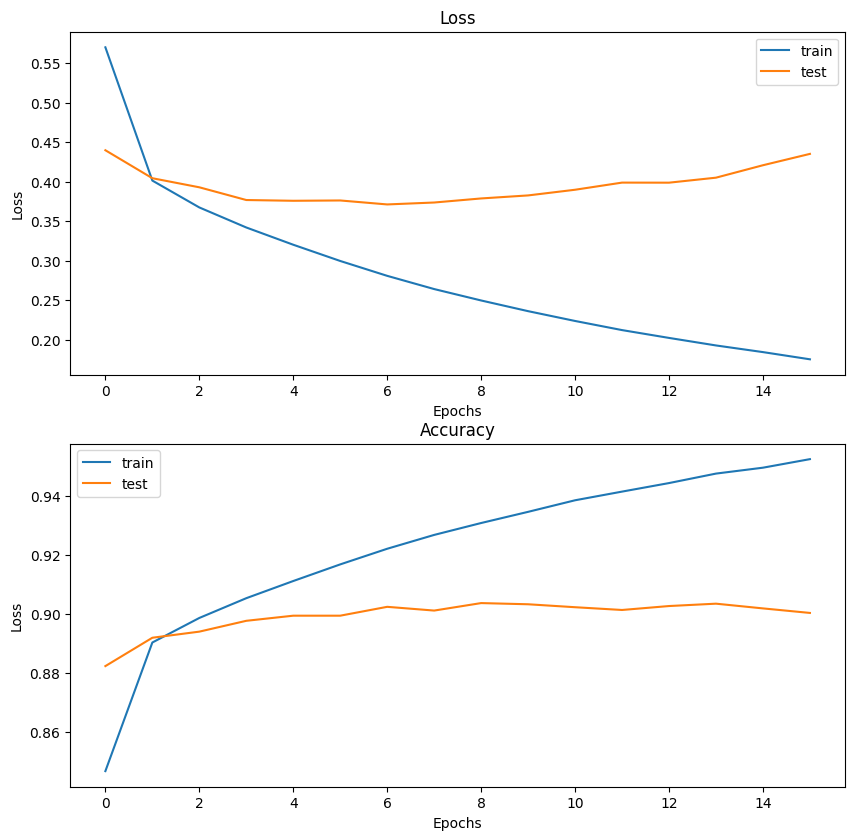

In [15]:
plt.figure(figsize=(10, 10), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(211)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history_model_1.history['loss'], label='train')
plt.plot(history_model_1.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history_model_1.history['accuracy'], label='train')
plt.plot(history_model_1.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [16]:
model_2 = Sequential()
model_2.add(Conv2D(64, kernel_size=3, input_shape=(28,28,1)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Conv2D(32, kernel_size=3))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Flatten())
model_2.add(Dense(128))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(10, activation='softmax'))
model_2.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
activation_3 (Activation)    (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)              

In [17]:
callbacks_model_2=[]
callbacks_model_2.append(EarlyStopping(monitor='val_accuracy', mode='max', patience=7))
history_model_2=model_2.fit(X_train, y_train, verbose=0, epochs=100,
            callbacks=callbacks_model_2,
            batch_size=512,
            validation_data=(X_valid, y_valid),
            shuffle=True)
loss_model_2, accuracy_model_2=model_2.evaluate(X_test,  y_test, verbose=0)
print(f"Model loss={loss_model_2}, accuracy={accuracy_model_2}")

Model loss=0.30387744307518005, accuracy=0.9145500063896179


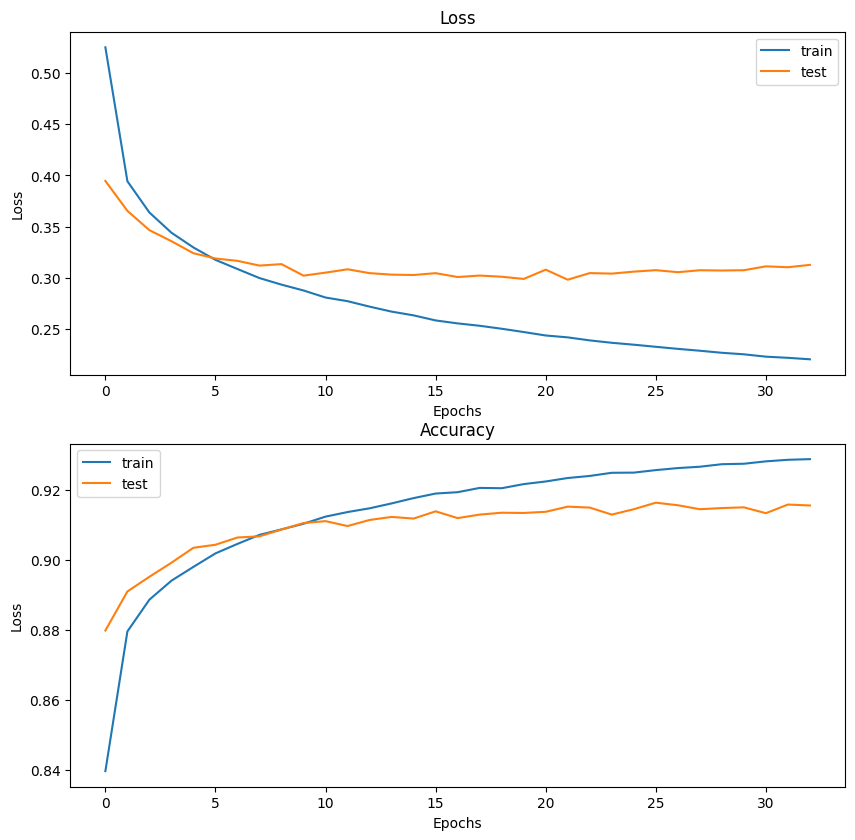

In [18]:
plt.figure(figsize=(10, 10), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(211)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history_model_2.history['loss'], label='train')
plt.plot(history_model_2.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history_model_2.history['accuracy'], label='train')
plt.plot(history_model_2.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [19]:
model_3 = Sequential()
model_3.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(28, 28, 1)))
model_3.add(MaxPooling2D(pool_size=(2,2), strides=2))
model_3.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2), strides=2))
model_3.add(Flatten())
model_3.add(Dense(120, activation='relu'))
model_3.add(Dense(84, activation='relu'))
model_3.add(Dense(10, activation='softmax'))
model_3.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [20]:
callbacks_model_3=[]
callbacks_model_3.append(EarlyStopping(monitor='val_accuracy', mode='max', patience=7))
history_model_3=model_3.fit(X_train, y_train, verbose=0, epochs=100,
            callbacks=callbacks_model_3,
            batch_size=512,
            validation_data=(X_valid, y_valid),
            shuffle=True)
loss_model_3, accuracy_model_3=model_3.evaluate(X_test,  y_test, verbose=0)
print(f"Model loss={loss_model_3}, accuracy={accuracy_model_3}")

Model loss=0.3081683814525604, accuracy=0.9150999784469604


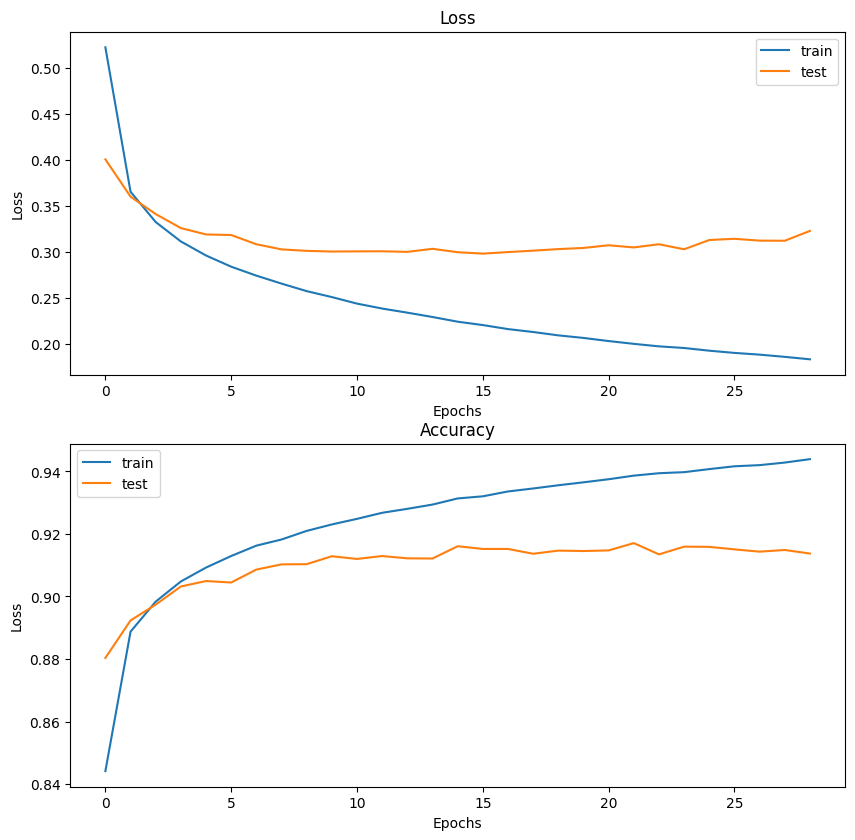

In [21]:
plt.figure(figsize=(10, 10), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(211)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history_model_3.history['loss'], label='train')
plt.plot(history_model_3.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history_model_3.history['accuracy'], label='train')
plt.plot(history_model_3.history['val_accuracy'], label='test')
plt.legend()
plt.show()